# House Price Prediction using Linear Regression and Regularization Models

## Introduction

In this notebook, we explore and analyze a housing dataset to predict house prices based on various features. We will implement multiple regression techniques, apply feature transformations, and evaluate model performance using different metrics. Additionally, we will experiment with regularization methods like Ridge, Lasso, and ElasticNet to handle multicollinearity and improve model generalization.

The main objectives of this notebook are:

- Evaluate different transformations on the target variable (`price`) and key numeric features.
- Train and test linear regression models and measure their performance using MAE, MSE, and R² scores.
- Apply regularization techniques and tune hyperparameters to optimize model performance.
- Analyze feature importance to understand which factors influence house prices the most.
- Visualize results using predicted vs actual plots, residual plots, and feature impact charts.

This notebook demonstrates a complete workflow for building a robust regression model, from data preprocessing to model evaluation and visualization.


### Lets Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Lets take a look at our Dataset

In [2]:
df = pd.read_csv('datasets/Housing-Clean.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,True,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,True,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,False,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,True,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,True,False,False


In [3]:
X = df[['area']].values
y = df['price'].values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    int64  
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    float64
 3   bathrooms                        545 non-null    float64
 4   stories                          545 non-null    float64
 5   mainroad                         545 non-null    int64  
 6   guestroom                        545 non-null    int64  
 7   basement                         545 non-null    int64  
 8   hotwaterheating                  545 non-null    int64  
 9   airconditioning                  545 non-null    int64  
 10  parking                          545 non-null    float64
 11  prefarea                         545 non-null    int64  
 12  furnishingstatus_furni

In [5]:
feature = ['area']

---

# Regression Model Implementation – Single Feature (Price and Area)

We create functions to streamline our workflow:

1. **Data Splitting:** The dataset is split into training and testing sets to evaluate model performance on unseen data.

2. **`linear_regression_eval()`**: This function fits a linear regression model and returns the trained model, predictions, and evaluation metrics including MAE, MSE, R² score, and feature coefficients.

3. **`stats()`**: Prints the evaluation metrics and feature coefficients, providing insights into the model's performance and feature importance.

4. **Model Fitting and Visualization:** The model is fitted to the training data and visualizations are created to assess how well the predicted values match the actual prices, along with examining residuals and feature impacts.


In [6]:
def linear_regression_eval(X_train, X_test, y_train, y_test, features=None):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_}).sort_values(by='Coefficient', key=abs, ascending=False)
    
    return model, y_pred, mae, mse, r2, coeff_df

In [7]:
def stats(mae, mse, r2, coeff_df):    
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.4f}\n")
    print("Coefficients:")
    print(coeff_df)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model, y_pred, mae, mse, r2, coeff_df = linear_regression_eval(X_train, X_test, y_train, y_test, feature)
stats(mae, mse, r2, coeff_df)

MAE: 1474748.13
MSE: 3675286604768.19
R2 Score: 0.2729

Coefficients:
  Feature    Coefficient
0    area  923045.796343


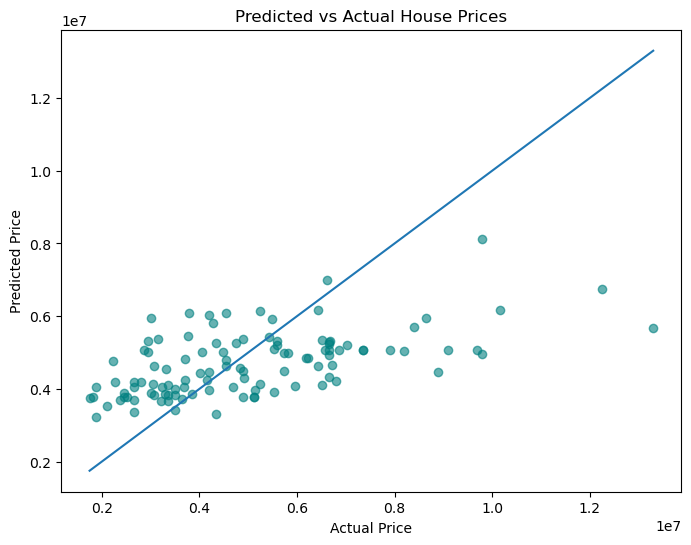

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual House Prices")
plt.savefig("plots/PvA-Linear.png", dpi=300, bbox_inches='tight')
plt.show()

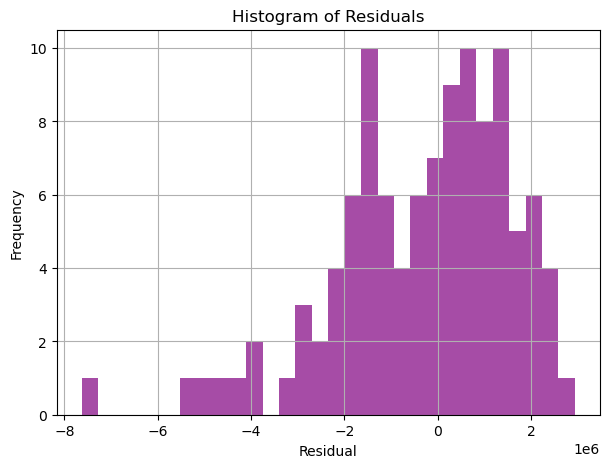

In [11]:
residuals = y_pred - y_test
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("plots/Residual-Linear.png", dpi=300, bbox_inches='tight')
plt.show()


### Result

As we can see, using only a single feature, the model's performance is limited.  
The resulting R² score is approximately **0.2729**, indicating that a significant portion of the variance in house prices is not captured by the model with just one feature.


---

## Regression Model Implementation - Multiple Features

Now, we expand our model to include all the features available in the dataframe.  
By incorporating multiple features, we aim to better capture the factors affecting house prices.  
We fit the regression model and evaluate its performance to see the improvement over the single-feature model.


In [12]:
def split_(df):
    X = df.drop('price', axis=1)
    y = df['price'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [13]:
features = df.drop('price', axis=1).columns

In [14]:
X_train, X_test, y_train, y_test = split_(df)
model, y_pred, mae, mse, r2, coeff_df = linear_regression_eval(X_train, X_test, y_train, y_test, features)
stats(mae, mse, r2, coeff_df)

MAE: 970043.40
MSE: 1754318687330.67
R2 Score: 0.6529

Coefficients:
                            Feature    Coefficient
8                   airconditioning  791426.735843
7                   hotwaterheating  684649.885339
10                         prefarea  629890.565313
2                         bathrooms  549420.501241
0                              area  511615.563777
6                          basement  390251.176181
4                          mainroad  367919.947680
3                           stories  353158.429856
13     furnishingstatus_unfurnished -233469.435624
5                         guestroom  231610.037176
9                           parking  193542.781675
11       furnishingstatus_furnished  180175.626604
1                          bedrooms   56615.572458
12  furnishingstatus_semi-furnished   53293.809019


### Result

With all features included, the model performs significantly better, achieving an R² score of approximately 0.6529.  

To further improve the model, we apply feature engineering by creating three new columns:  
- `total_rooms`  
- `area_per_bedroom`  
- `total_features`  

These new features are designed to help the model capture relationships more effectively.  
After creating these features, we standardise them to ensure they are on a comparable scale with the other numeric features.


In [15]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom']
df['area_per_bedroom'] = df['area'] / (df['bedrooms'] + 1)
df['total_features'] = df['stories'] + df['parking'] + df['basement'] + df['airconditioning'] + df['hotwaterheating']

features = df.drop('price', axis=1).columns

In [16]:
df.isna().any().any()

np.False_

In [17]:
cols_to_scale = ['total_rooms', 'area_per_bedroom', 'total_features']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [18]:
X_train, X_test, y_train, y_test = split_(df)
model, y_pred, mae, mse, r2, coeff_df = linear_regression_eval(X_train, X_test, y_train, y_test, features)
stats(mae, mse, r2, coeff_df)

MAE: 968588.16
MSE: 1746457605837.42
R2 Score: 0.6545

Coefficients:
                            Feature    Coefficient
10                         prefarea  630044.562821
16                   total_features  525060.778593
0                              area  514347.645622
8                   airconditioning  484174.786241
2                         bathrooms  408449.667807
7                   hotwaterheating  387680.867427
4                          mainroad  369068.738323
14                      total_rooms  238087.640722
13     furnishingstatus_unfurnished -234206.266590
11       furnishingstatus_furnished  180186.395798
9                           parking -115079.830288
6                          basement   91064.403902
5                         guestroom   82259.795930
1                          bedrooms  -74734.721358
12  furnishingstatus_semi-furnished   54019.870792
3                           stories   48900.742577
15                 area_per_bedroom   34305.032165


---

## Transformations

We observe a slight improvement in the R² score.  

However, the coefficients are extremely large. This is due to the `price` feature having values in the range of 10⁷ to 10⁸.  

To address this issue, we apply transformations to the `price` feature. These transformations reduce its variance and stabilise the values, making the model more reliable and interpretable.


In [19]:
def apply_transformations(df):
    transformations = {
        "original": lambda x: x,
        "sqrt": np.sqrt,
        "cuberoot": np.cbrt,
        "log": lambda x: np.log1p(x),  # log1p handles log(0)
        "yeo-johnson": lambda x: PowerTransformer(method='yeo-johnson').fit_transform(x.values.reshape(-1,1)).flatten()
    }
    
    for i in range(2, 11):
        transformations[f"{i}th_root"] = lambda x, n=i: np.power(x, 1/n)
    
    return transformations

In [20]:
r2_scores = {}
transformations = apply_transformations(df)

for name, func in transformations.items():
    df_trans = df.copy()
    df_trans['price'] = func(df_trans['price'])
    
    X_train, X_test, y_train, y_test = split_(df_trans)
    model, y_pred, mae, mse, r2, coeff_df = linear_regression_eval(X_train, X_test, y_train, y_test, features)
    
    r2_scores[name] = r2 
    print(f"\n{name.upper()} Transformation Results:")
    stats(mae, mse, r2, coeff_df)


ORIGINAL Transformation Results:
MAE: 968588.16
MSE: 1746457605837.42
R2 Score: 0.6545

Coefficients:
                            Feature    Coefficient
10                         prefarea  630044.562821
16                   total_features  525060.778593
0                              area  514347.645622
8                   airconditioning  484174.786241
2                         bathrooms  408449.667807
7                   hotwaterheating  387680.867427
4                          mainroad  369068.738323
14                      total_rooms  238087.640722
13     furnishingstatus_unfurnished -234206.266590
11       furnishingstatus_furnished  180186.395798
9                           parking -115079.830288
6                          basement   91064.403902
5                         guestroom   82259.795930
1                          bedrooms  -74734.721358
12  furnishingstatus_semi-furnished   54019.870792
3                           stories   48900.742577
15                 area_per_be

### Transformations - Plotting

Next, we compare the different transformations applied to the `price` feature.  

We plot the R² scores for each transformation to determine which one yields the highest R² and produces more stable and interpretable coefficients.


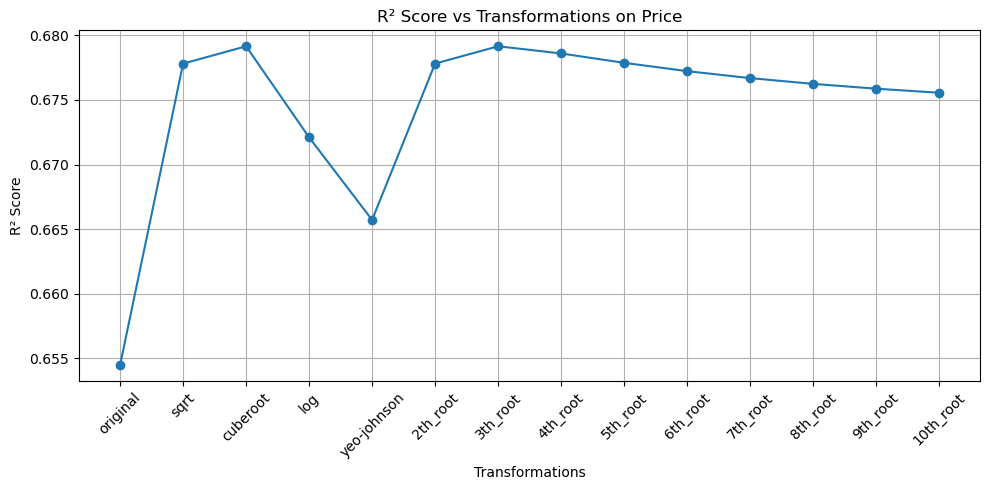

In [21]:
plt.figure(figsize=(10,5))
plt.plot(list(r2_scores.keys()), list(r2_scores.values()), marker='o', linestyle='-')
plt.title("R² Score vs Transformations on Price")
plt.xlabel("Transformations")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/r2Vtransf.png", dpi=300, bbox_inches='tight')
plt.show()

As observed from the graph above, the cube root transformation of `price` gave the best results.  

We will now apply this transformation to our dataset.  
A copy of the original dataset is also retained for later comparison with the predicted values.


In [22]:
df_cbrt = df.copy()
df_cbrt['price'] = np.cbrt(df_cbrt['price'])

X_train, X_test, y_train, y_test = split_(df_cbrt)

model, y_pred, mae, mse, r2, coeff_df = linear_regression_eval(X_train, X_test, y_train, y_test, features)

stats(mae, mse, r2, coeff_df)

MAE: 11.00
MSE: 194.00
R2 Score: 0.6792

Coefficients:
                            Feature  Coefficient
10                         prefarea     7.095442
16                   total_features     5.935812
0                              area     5.848805
4                          mainroad     5.547033
8                   airconditioning     5.437331
2                         bathrooms     4.035863
7                   hotwaterheating     4.018696
13     furnishingstatus_unfurnished    -3.591870
14                      total_rooms     2.677764
11       furnishingstatus_furnished     2.004481
6                          basement     1.696602
12  furnishingstatus_semi-furnished     1.587388
9                           parking    -1.572810
5                         guestroom     1.399893
1                          bedrooms    -0.757301
3                           stories     0.557838
15                 area_per_bedroom     0.033713


---

## Regularisation

The coefficients after transformation appear reasonable. Another approach to improve model performance and control overfitting is by applying **Regularisation**.  

We will explore different regularisation methods—**Ridge, Lasso, and ElasticNet**—using alpha values of 0.001, 0.01, 0.1, 0.5, and 1, and compare their R² scores.


In [23]:
alphas = [0.001, 0.01, 0.1, 0.5, 1]

In [24]:
ridge_metrics = {}
lasso_metrics = {}
elastic_metrics = {}

In [25]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_metrics[alpha] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'Coefficients': ridge.coef_
    }

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_metrics[alpha] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'Coefficients': lasso.coef_
    }

    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=10000)
    elastic.fit(X_train, y_train)
    y_pred = elastic.predict(X_test)
    elastic_metrics[alpha] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'Coefficients': elastic.coef_
    }

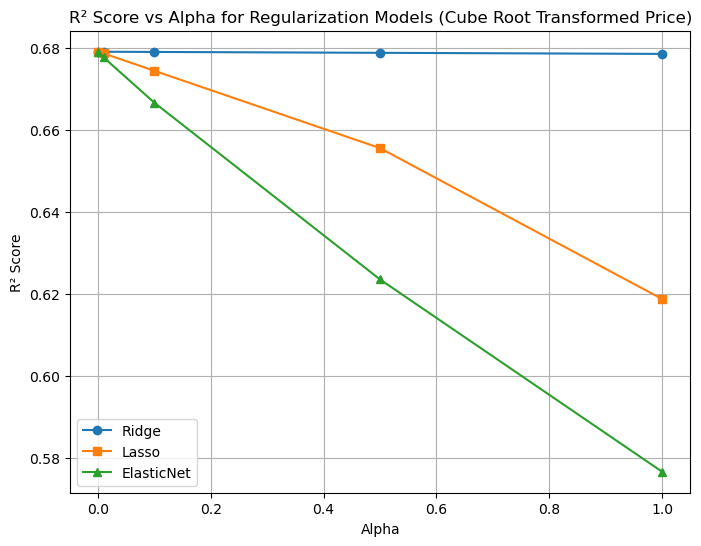

In [26]:
plt.figure(figsize=(8,6))
plt.plot(alphas, [ridge_metrics[a]['R2'] for a in alphas], marker='o', label='Ridge')
plt.plot(alphas, [lasso_metrics[a]['R2'] for a in alphas], marker='s', label='Lasso')
plt.plot(alphas, [elastic_metrics[a]['R2'] for a in alphas], marker='^', label='ElasticNet')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha for Regularization Models (Cube Root Transformed Price)')
plt.legend()
plt.grid(True)
plt.savefig("plots/r2Va-multi.png", dpi=300, bbox_inches='tight')
plt.show()

In [27]:
for i in ridge_metrics.keys():
    print(f"Alpha: {i}: {ridge_metrics[i]['R2']}")
    

Alpha: 0.001: 0.6791568242530186
Alpha: 0.01: 0.6791519684781873
Alpha: 0.1: 0.6791034719691682
Alpha: 0.5: 0.6788892545515515
Alpha: 1: 0.6786244111494623


---

## Result

From the comparison, **Ridge regularisation** performed the best among the three methods.  
However, the improvement in R² score is not very significant.  

Thus, regularisation can be skipped for this dataset.  
If desired, you can still apply Ridge by setting the `best_alpha` parameter to the preferred alpha value.


In [28]:
best_alpha = 0.001
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train, y_train)

y_pred_ridge = ridge_final.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

coeff_df_ridge = pd.DataFrame({
    'Feature': features,
    'Coefficient': ridge_final.coef_,
    'Importance': abs(ridge_final.coef_)
}).sort_values(by='Importance', ascending=False)

In [29]:
print(f"Ridge Regression (alpha={best_alpha}) Results:")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.4f}\n")
print("Coefficients:")
print(coeff_df_ridge)

Ridge Regression (alpha=0.001) Results:
MAE: 11.00
MSE: 194.00
R² Score: 0.6792

Coefficients:
                            Feature  Coefficient  Importance
10                         prefarea     7.095359    7.095359
16                   total_features     5.935757    5.935757
0                              area     5.848808    5.848808
4                          mainroad     5.546942    5.546942
8                   airconditioning     5.437284    5.437284
2                         bathrooms     4.035852    4.035852
7                   hotwaterheating     4.018496    4.018496
13     furnishingstatus_unfurnished    -3.591854    3.591854
14                      total_rooms     2.677765    2.677765
11       furnishingstatus_furnished     2.004475    2.004475
6                          basement     1.696650    1.696650
12  furnishingstatus_semi-furnished     1.587379    1.587379
9                           parking    -1.572754    1.572754
5                         guestroom     1.399899   

In [30]:
y_test_orig = y_test ** 3
y_pred_orig = y_pred_ridge ** 3

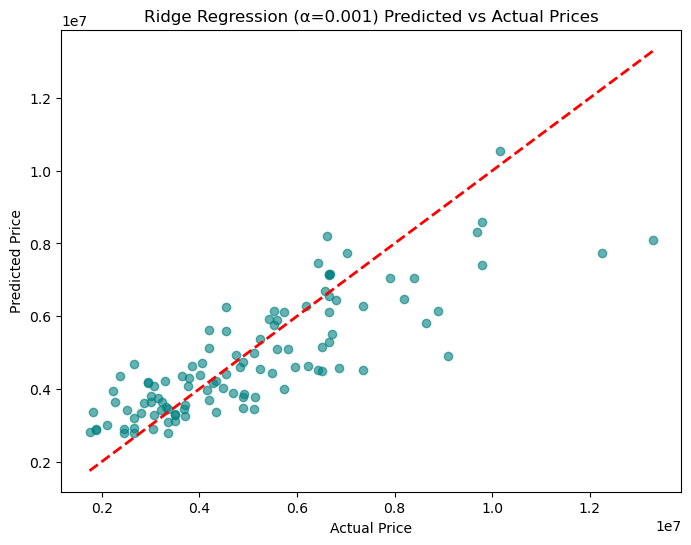

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.6, color='teal')
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Ridge Regression (α={best_alpha}) Predicted vs Actual Prices")
plt.savefig("plots/pVa-multi.png", dpi=300, bbox_inches='tight')
plt.show()

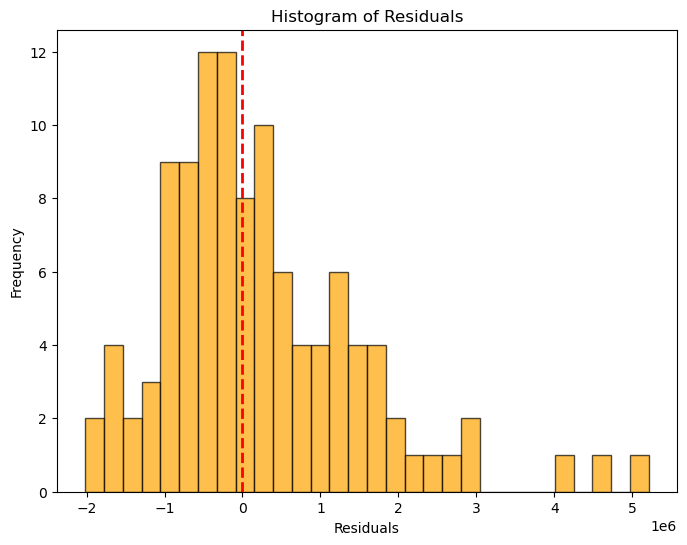

In [32]:
residuals = y_test_orig - y_pred_orig
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.savefig("plots/rediduals-Linear.png", dpi=300, bbox_inches='tight')
plt.show()

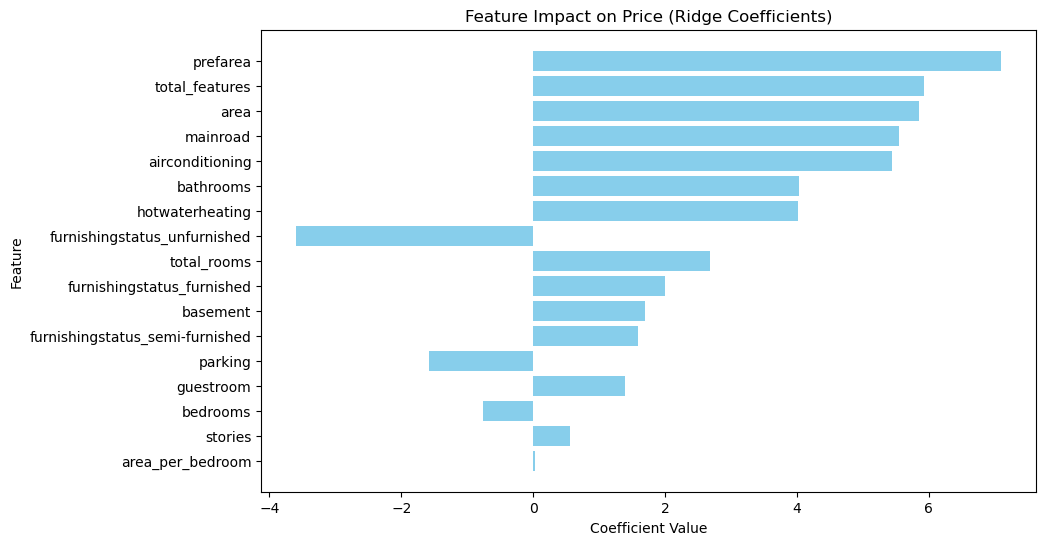

In [33]:
coeff_df_ridge_sorted = coeff_df_ridge.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(coeff_df_ridge_sorted['Feature'], coeff_df_ridge_sorted['Coefficient'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Impact on Price (Ridge Coefficients)")
plt.savefig("plots/feature-Impact.png", dpi=300, bbox_inches='tight')
plt.show()

---

## Conclusion

Even after applying these techniques, it is not possible to perfectly predict the house prices.  
This is because the model assumes **linear relationships**, which may not hold for all features, limiting its predictive performance.  

The final model can be **saved** for future use and predictions.


In [34]:
model_path = "models/regression_model.pkl"
joblib.dump(ridge_final, model_path)

['models/regression_model.pkl']

---